# Prawo Benforda
## Antoni Perużyński

## Imports

In [ ]:
#pip install sigfig

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
def toInterval10To100(x): 
  while (x<10 or x>=100):
    if x < 10:
      x *=10
    elif x >= 100:
      x/=10
  return x

In [ ]:
from scipy.stats import variation 

def stats (data):
  print("Mean", data.mean())
  print("Varation", data.var())
  print("Std", data.std())
  print("Median", data.median())
  print("Mode", data.mode())
  print("Skew", data.skew())
  print("Kurtosis", data.kurtosis())
  print("Variation", variation(data))

## Testy statystyczne

### Test zgodności Chi^2

In [ ]:
def chi2 (theoryDist, expDist):
    chiSquareStat = 0
    for i in range(len(theoryDist)):
        chiSquareStat += (expDist[i]-theoryDist[i])**2/theoryDist[i]
    #print("\nChi-squared Test Statistic = {:.3f}".format(chiSquareStat))   
    return chiSquareStat

### Test MAD

In [44]:
def testMAD(theoryDist, expDist):
  madStat = 0
  for i, j in zip(theoryDist, expDist):
    madStat += abs(i-j)

  madStat = madStat/len(theoryDist)   
  return madStat

### Test Cho-Gains

In [28]:
def testChoGains(theoryDist, expDist):
  nom = 0
  for i,j in zip(theoryDist, expDist):
    nom += (i-j)**2
  nom = math.sqrt(nom)
  denom = 0
  for i in range(0,7):
    denom += expDist[i]**2 + (1-expDist[8])**2
  denom = math.sqrt(denom)
  return nom/denom

### Test dla wskaźnika struktury

In [ ]:
def structureIndicator(theoryDist, expDist, n):
    strIndStat = 0
    for i,j in zip(theoryDist, expDist):
        strIndStat += (np.absolute(j-i)-1/(2*n))/(i*(1-i))**(1/2)
    strIndStat = strIndStat*(1/len(theoryDist))*(n**(1/2))
    return strIndStat

In [68]:
def sumZ (theoryDist, expDist, n):
  sumZ = []
  for i,j in zip(theoryDist, expDist):
    zi = math.sqrt(n)*(j-i)/((i)*(1-i))
    sumZ.append(zi)
  return sumZ

### Test Kołmogorowa-Smirnowa

In [ ]:
def KolmogorowSmirnow(theoryDist, expDist, n):
    KSStat = math.sqrt(n)
    tD = np.cumsum(theoryDist)
    eD = np.cumsum(expDist)
    D=max(np.absolute(np.array(tD)-np.array(eD)))
    KSStat *= D
    return KSStat

### Test KS1

In [ ]:
def KS1(theoryDist, expDist, n):
    KSStat = math.sqrt(n**2/(2*n))
    tD = np.cumsum(theoryDist)
    eD = np.cumsum(expDist)
    D=max(np.absolute(np.array(tD)-np.array(eD)))
    KSStat *= D
    return KSStat

### Test KS3

In [ ]:
def KS3(theoryDist, expDist, n):
    N = n**2/(2*n)
    KSStat = (math.sqrt(N)+0.155+0.24*(N)**(-1/2))
    tD = np.cumsum(theoryDist)
    eD = np.cumsum(expDist)
    DNPlus = max(np.array(eD) - np.array(tD))
    DNMinus = max(np.array(tD) - np.array(eD))
    Vn = DNPlus + DNMinus
    KSStat *= Vn
    return KSStat

### Test Podobieństwa

In [55]:
def Measure_Similaristy_1(theoryDist, expDist):
    M1 = 100/9
    sum = 0
    for i,j in zip(theoryDist, expDist):
      sum+= abs((j-i)/i)  
    M1 = M1*sum
    return M1

In [56]:
def Measure_Similaristy_2(theoryDist, expDist):
    M2 = 1/9
    sum = 0
    for i,j in zip(theoryDist, expDist):
      sum+= (j-i)**2 
    M2 = M2*math.sqrt(sum)
    return M2

In [57]:
def Measure_Similaristy_3(theoryDist, expDist):
    sum = 0
    for i,j in zip(theoryDist, expDist):
      sum+= (j-i)**2 
    M3 = math.sqrt(sum/9)
    return M3

### Test Odległości 

In [ ]:
def distanceTest(theoryDist, expDist):
    return max(np.absolute(np.array(theoryDist)-np.array(expDist)))

## Load data

In [ ]:
def load_data(filename):
        df=pd.read_excel(filename)
        return df

## Benford digits

In [ ]:
def count_first_digit(data):
    # Get only non-zero values
    data = data[data>=1]

    # Get the first digits
    first_digits = list(map(lambda x: int(str(x)[0]), data))
    
    
    # Count occurences. Make sure every position is for [1-9]
    empirical_counts = np.zeros(9)
    digit = []
    for i in range(1, 10):
        empirical_counts[i - 1] = first_digits.count(i)
        digit.append(i)

    # Total amount
    total_count = sum(empirical_counts)
    # Make percentage
    empirical_frequency = [(i / total_count) for i in empirical_counts]
    # Return
    return(empirical_counts, empirical_frequency, total_count, digit)

In [ ]:
def count_second_digit(data):
    # Get only non-zero values
    data = data[data>=0]

    # Get the first digits
    dataMore10 = data[data>=10]
    second_digits = list(map(lambda x: int(str(x)[1]), dataMore10))
    for i in data[data<10]:
        second_digits.append(0)
    
    
    # Count occurences. Make sure every position is for [1-9]
    empirical_counts = np.zeros(10)
    digit = []
    for i in range(0, 10):
        empirical_counts[i] = second_digits.count(i)
        digit.append(i)

    # Total amount
    total_count = sum(empirical_counts)
    # Make percentage
    empirical_frequency = [(i / total_count) for i in empirical_counts]
    # Return
    return(empirical_counts, empirical_frequency, total_count, digit)

In [ ]:
def count_two_first_digit(data):
    # Get only non-zero values
    data = data[data>=0]

    # Get the first digits
    dataMore10 = data[data>=10]
    second_digits = list(map(lambda x: int(str(x)[:2]), dataMore10))

    # Count occurences. Make sure every position is for [1-9]
    empirical_counts = np.zeros(90)
    digit = []
    for i in range(10, 100):
        empirical_counts[i-10] = second_digits.count(i)
        digit.append(i)

    # Total amount
    total_count = sum(empirical_counts)
    # Make percentage
    empirical_frequency = [(i / total_count) for i in empirical_counts]
    # Return
    return(empirical_counts, empirical_frequency, total_count, digit)

In [ ]:
def count_last_digit(data):
    # Get only non-zero values
    data = data[data>=0]

    # Get the first digits
    last_digits = list(map(lambda x: int(str(x)[-1]), data))
    
    # Count occurences. Make sure every position is for [1-9]
    empirical_counts = np.zeros(10)
    digit = []
    for i in range(0, 10):
        empirical_counts[i] = last_digits.count(i)
        digit.append(i)

    # Total amount
    total_count = sum(empirical_counts)
    # Make percentage
    empirical_frequency = [(i / total_count) for i in empirical_counts]
    # Return
    return(empirical_counts, empirical_frequency, total_count, digit)

## Theoretical Benford Distributions

In [ ]:
def theoretical_1st_number_counts():
    benford_first=[]
    for i in range(1,10):
        benford_first.append(math.log10(1+1/i))
    return benford_first

In [ ]:
def theoretical_2nd_number_counts():
    benford_second=[]
    for i in range(0,10):
        suma=0
        for j in range (1,10):
            suma = suma + math.log10(1+(1/(10*j+i)))
        benford_second.append(suma)
    return benford_second

In [ ]:
def theoretical_two_1st_number_counts():
    return [round(math.log(1+(i)**(-1), 10), 6)for i in range(10,100)]

## Program

In [ ]:
def newCasesForCountry(dfAll, country):
  dfCountry=dfAll[["date",country]]
  dfCountry = dfCountry.dropna()
  dfCountry.reset_index(drop=True, inplace=True)
  dfCountry.iloc[:,1] = dfCountry.iloc[:,1].astype(int)
  dfCountry.rename(columns =  {country: "new_cases"}, inplace = True)
  return dfCountry

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/MyDrive/UE/Praca_magisterska_Prawo_Benforda/Data/"

Mounted at /content/drive
new_cases.csv


In [ ]:
dfAll = pd.read_csv("/content/drive/MyDrive/UE/Praca_magisterska_Prawo_Benforda/Data/new_cases.csv")

In [ ]:
df = newCasesForCountry(dfAll, "Poland")

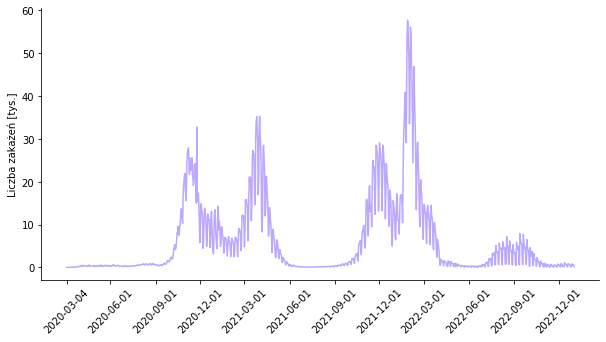

In [26]:
plt.figure(figsize=(10, 5))

#plt.title(f"Wykres liczby zakażeń na COVID-19 w Polsce pomiędzy {df.date.iloc[0]} - {df.date.iloc[-1]}", fontsize = 10)
plt.plot(df.date, df.new_cases/1000, '#bca8ff')
#plt.xlim([datetime.date(2020,3,4),datetime.date(2020, 10, 10)])
plt.xticks(rotation = 45)

plt.ylabel("Liczba zakażeń [tys.]", fontsize = 10)

ax = plt.gca()
list_x_tick = ["2020-03-04", "2020-06-01", "2020-09-01", "2020-12-01","2021-03-01" ,"2021-06-01" ,"2021-09-01", "2021-12-01","2022-03-01", "2022-06-01", "2022-09-01", "2022-12-01"]
ax.set_xticks(list_x_tick)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

In [29]:
empirical_counts, empirical_frequency, total_count, digit = count_first_digit(df['new_cases'])
empirical_counts2, empirical_frequency2, total_count2, digit2 = count_second_digit(df['new_cases'])
empirical_two_first_counts, empirical_two_first_frequency2, total_two_first_count2, digit_two_first = count_two_first_digit(df['new_cases'])

In [30]:
theoretical_1st_number = theoretical_1st_number_counts()
theoretical_2nd_number = theoretical_2nd_number_counts()
theoretical_two_1st_number = theoretical_two_1st_number_counts()

## Visualization

In [ ]:
def first_digit_chart(empirical_frequency, theoretical_frequency, title):
    x = [i for i in range(1,10)]
    x = np.array(x)
    y1 = np.array(empirical_frequency)
    y2 = np.array(theoretical_frequency)
    
        
    plt.figure(figsize=(10, 5))
    plt.xticks(x)

    
    plt.ylabel("Prawdopodobieństwo")
    plt.xlabel("Pierwsza cyfra znacząca")
    plt.title(title)
    #plt.scatter(x, y2, s=150, c='red', zorder=2, marker = 11)
    plt.plot(x, y2, zorder = 2, c='red')
    plt.bar(x, y1)
    
    
    plt.show()
    return plt

In [ ]:
def first_digit_chart_dots(empirical_frequency, theoretical_frequency, title):

    """Make bar chart of observed vs expected 1st digit frequency in percent."""

    fig, ax = plt.subplots(figsize = (10,5))
    index = [i + 1 for i in range(len(empirical_frequency))]  # 1st digits for x-axis
    # text for labels, title and ticks

    fig.canvas.set_window_title('Percentage First Digits')
    #ax.set_title('Data vs. Benford Values', fontsize=15)
    ax.set_ylabel('Frequency (%)', fontsize = 10)
    ax.set_xticks(index)
    ax.set_xticklabels(index, fontsize=10)

    # build bars    
    rects = ax.bar(index, empirical_frequency, width=0.95, color='#bca8ff', label='Data')

    # attach a text label above each bar displaying its height
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height, '{:0.1f}'.format(height), ha='center', va='bottom', fontsize=13)

    # plot Benford values as red dots
    ax.scatter(index, theoretical_frequency, s=150, c='black', zorder=2, label='Benford')
    # Hide the right and top spines & add legend
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend(prop={'size':10}, frameon=True)
    plt.show()

<ipython-input-93-bb1dda60fea9>:9: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use `.FigureManagerBase.set_window_title` or GUI-specific methods instead.
  fig.canvas.set_window_title('Percentage First Digits')


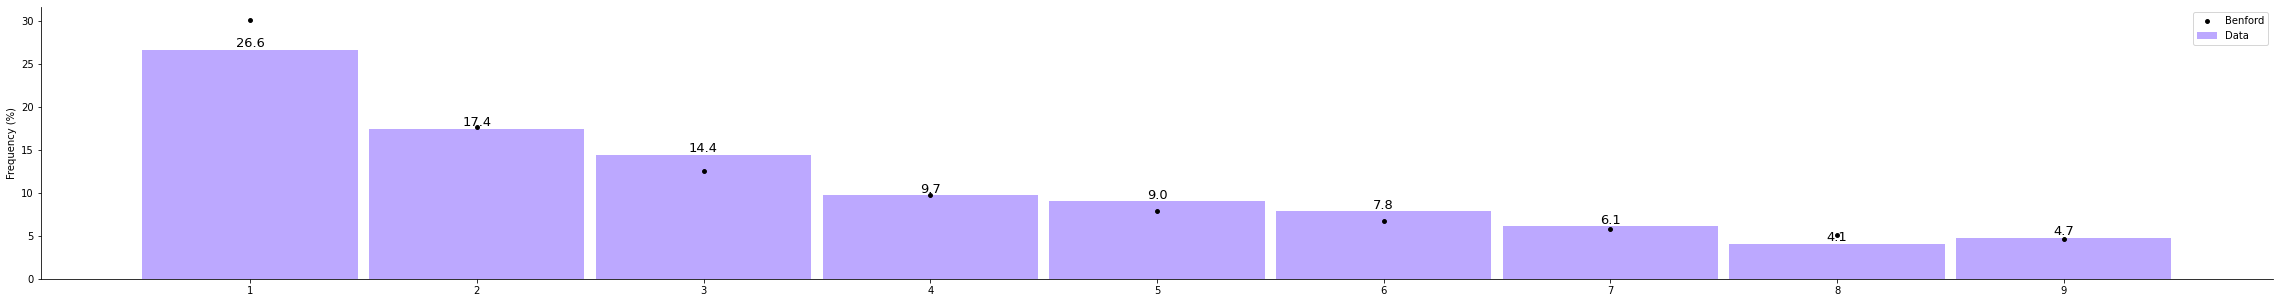

In [ ]:
first_digit_chart_dots(np.array(empirical_frequency)*100, np.array(theoretical_1st_number)*100, "First digit for Poland")

<ipython-input-87-cbf8d5f750c5>:9: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use `.FigureManagerBase.set_window_title` or GUI-specific methods instead.
  fig.canvas.set_window_title('Percentage First Digits')


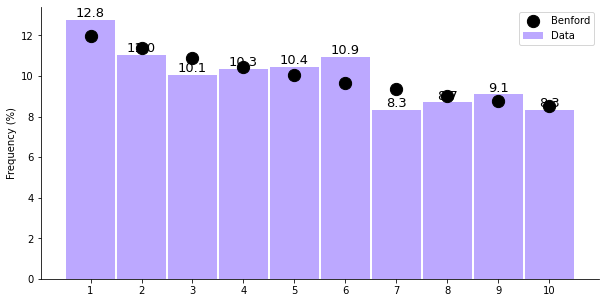

In [ ]:
first_digit_chart_dots(np.array(empirical_frequency2)*100, np.array(theoretical_2nd_number)*100, "Second digit for Poland")

<ipython-input-98-bb1dda60fea9>:9: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use `.FigureManagerBase.set_window_title` or GUI-specific methods instead.
  fig.canvas.set_window_title('Percentage First Digits')


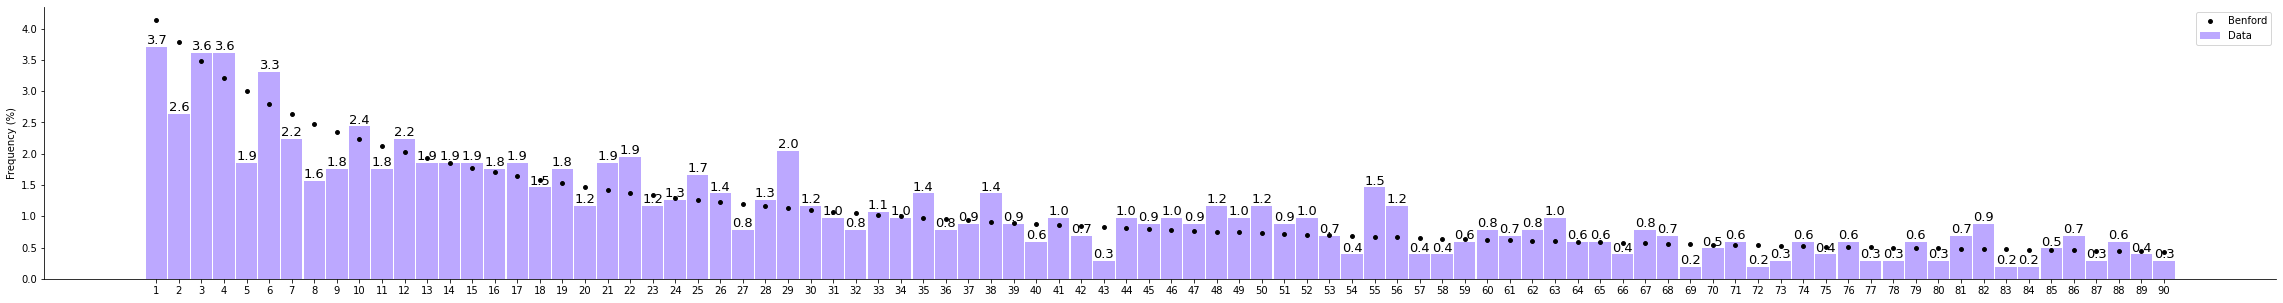

In [ ]:
first_digit_chart_dots(np.array(empirical_two_first_frequency2)*100, np.array(theoretical_two_1st_number)*100, "Two first digits for Poland")

In [ ]:
def second_digit_chart(empirical_frequency, theoretical_frequency):
   
    x = [i for i in range(0,10)]
    x = np.array(x)
    y1 = np.array(empirical_frequency)
    y2 = np.array(theoretical_frequency)
    
        
    plt.figure(figsize=(10, 5))
    plt.xticks(x)

    
    plt.ylabel("Prawdopodobieństwo")
    plt.xlabel("Druga cyfra znacząca")
    #plt.scatter(x, y2, s=150, c='red', zorder=2, marker = 11)
    plt.plot(x, y2, zorder = 2, c='red')
    plt.bar(x, y1)
    
    
    plt.show()

In [ ]:
def two_first_digit_chart(empirical_frequency, theoretical_frequency):
   
    x = [i for i in range(10,100)]
    x = np.array(x)
    y1 = np.array(empirical_frequency)
    y2 = np.array(theoretical_frequency)
    
        
    plt.figure(figsize=(20, 5))
    plt.xticks(np.arange(10, 100, 10.0))
    
    plt.ylabel("Prawdopodobieństwo")
    plt.xlabel("Druga cyfra znacząca")
    #plt.scatter(x, y2, s=150, c='red', zorder=2, marker = 11)
    plt.plot(x, y2, zorder = 2, c='red')
    plt.bar(x, y1)
    
    
    plt.show()
    

## First digit d1

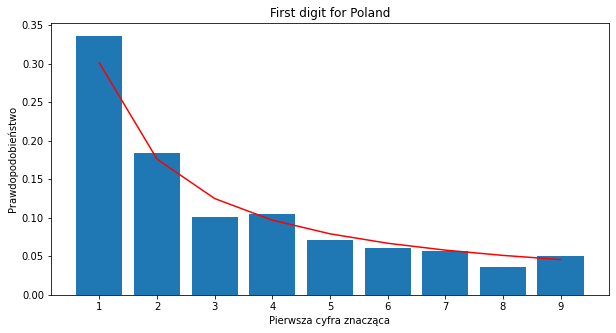

In [ ]:
first_digit_chart(empirical_frequency, theoretical_1st_number, "First digit for Poland")

In [ ]:
# First wat of chi2
# x = sum([(o-e)**2./e for o,e in zip(empirical_frequency,theoretical_1st_number)])
# x*total_count


# x= np.array(theoretical_1st_number)*total_count
# chi2(x, empirical_counts)

# Third way of chi2
# from scipy.stats import chisquare
# chisquare(empirical_counts, f_exp=x)

In [ ]:
#chi2(np.array(theoretical_1st_number)* total_count,np.array(empirical_frequency)* total_count)

In [34]:
# Forth way of chi2
chi2(theoretical_1st_number, empirical_frequency) * total_count

13.282419495710196

Statystyka testowa: $ \frac{\chi^2}{n} $

In [35]:
chi2(theoretical_1st_number,empirical_frequency) 

0.012870561526850965

In [36]:
KolmogorowSmirnow(theoretical_1st_number,empirical_frequency, total_count)

1.1638729311997194

In [37]:
KS1(theoretical_1st_number,empirical_frequency, total_count)

0.8229824420907857

In [38]:
KS3(theoretical_1st_number,empirical_frequency, total_count)

1.0287730261206782

In [54]:
testChoGains(theoretical_1st_number, empirical_frequency)

0.2653755296228139

In [45]:
testMAD(theoretical_1st_number, empirical_frequency)

0.010376759573794869

In [72]:
total_count

1032.0

In [69]:
sumZ(theoretical_1st_number, empirical_frequency, total_count)

[-5.276053274996936,
 -0.37036433443936617,
 5.712487992288298,
 -0.003959945725003492,
 4.817962993655642,
 5.935660330036079,
 1.7962503465884738,
 -6.919809058664399,
 1.2677593776664429]

In [73]:
(0.3010299956639812-0.26647286821705424)*math.sqrt(1032)*(1/(0.26647286821705424*(1-0.26647286821705424)))

5.679476469621973

In [70]:
theoretical_1st_number

[0.3010299956639812,
 0.17609125905568124,
 0.12493873660829992,
 0.09691001300805642,
 0.07918124604762482,
 0.06694678963061322,
 0.05799194697768673,
 0.05115252244738129,
 0.04575749056067514]

In [71]:
empirical_frequency

[0.26647286821705424,
 0.1744186046511628,
 0.14437984496124032,
 0.09689922480620156,
 0.09011627906976744,
 0.07848837209302326,
 0.061046511627906974,
 0.040697674418604654,
 0.04748062015503876]

In [47]:
structureIndicator(theoretical_1st_number, empirical_frequency, total_count) # Srednia dla

10.95323738724625

In [62]:
Measure_Similaristy_1(theoretical_1st_number, empirical_frequency)

9.835867178235311

In [64]:
Measure_Similaristy_2(theoretical_1st_number, empirical_frequency)

0.0049056985024526975

In [60]:
Measure_Similaristy_3(theoretical_1st_number, empirical_frequency)

0.014717095507358093

In [ ]:
distanceTest(theoretical_1st_number, empirical_frequency)

0.03455712744692696

## Second digit d2

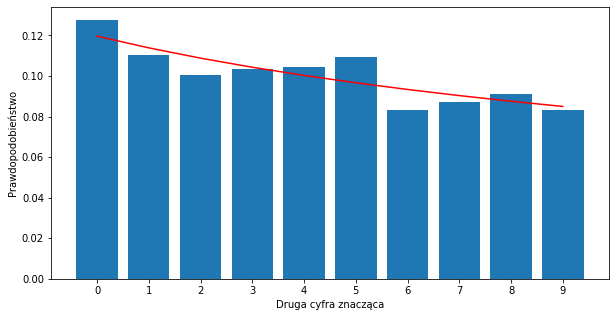

In [ ]:
second_digit_chart(empirical_frequency2, theoretical_2nd_number)

## Two firsts digits d1d2

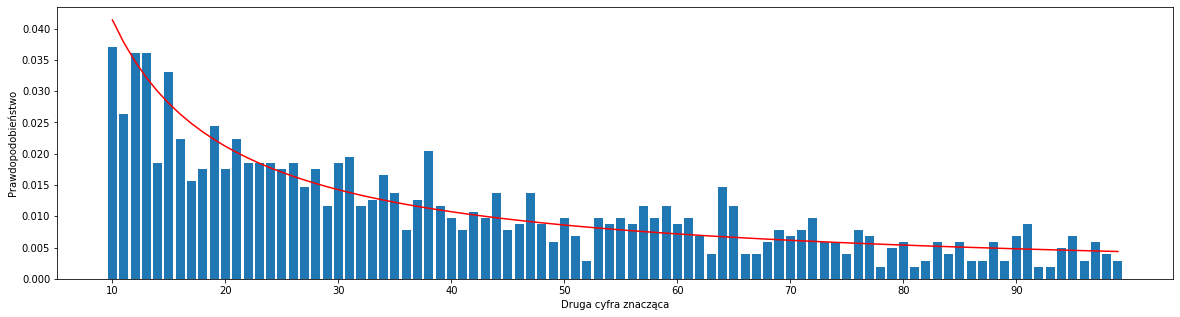

In [ ]:
two_first_digit_chart(empirical_two_first_frequency2, theoretical_two_1st_number)

## The first digit in each wave of disease

In [ ]:
df_1_wave = df[( ((df["date"]<= '2020-09-20')))]

In [ ]:
df_1_wave.head(2)

,date,new_cases
0,2020-03-04,1
1,2020-03-05,0


In [ ]:
df_1_wave.describe()

,new_cases
count,201.000000
mean,394.228856
std,210.205155
min,0.000000
25%,272.000000
50%,362.000000
75%,545.000000
max,1002.000000


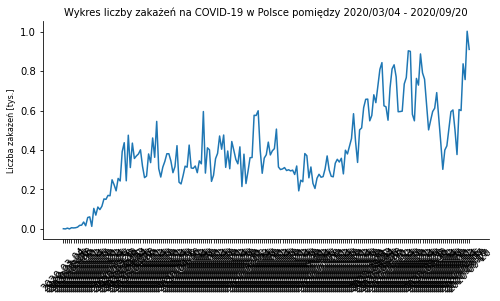

In [ ]:
plt.figure(figsize=(8, 4))
plt.ylabel("Liczba zakażeń [tys.]", fontsize = 8)
plt.xticks(rotation = 45)
plt.title("Wykres liczby zakażeń na COVID-19 w Polsce pomiędzy 2020/03/04 - 2020/09/20", fontsize = 10)
plt.plot(df_1_wave.date, df_1_wave.new_cases/1000)
#plt.xlim([datetime.date(2020,3,4),datetime.date(2020, 10, 10)])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

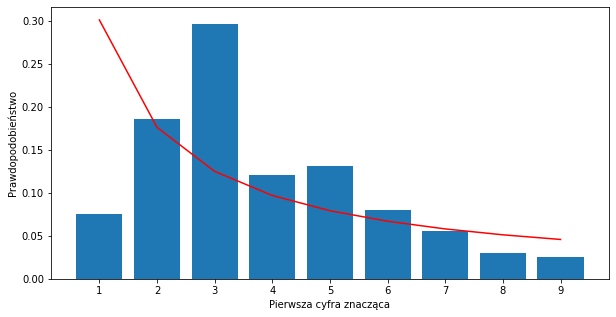

In [ ]:
empirical_counts_1_wave, empirical_frequency_1_wave, total_count_1_wave, digit_1_wave = count_first_digit(df_1_wave['new_cases'])

first_digit_chart(empirical_frequency_1_wave, theoretical_1st_number)

In [ ]:
df_2_wave = df[((df["date"]>= '2020-09-21') & ((df["date"]<= '2021-09-21')))]

In [ ]:
df_2_wave.head(2)

,date,new_cases
201,2020-09-21,748
202,2020-09-22,711


In [ ]:
df_2_wave.describe()

,new_cases
count,366.000000
mean,7704.284153
std,8524.757422
min,38.000000
25%,368.500000
50%,4884.000000
75%,12146.000000
max,35253.000000


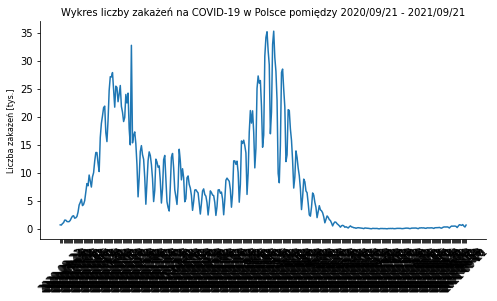

In [ ]:
plt.figure(figsize=(8, 4))
plt.ylabel("Liczba zakażeń [tys.]", fontsize = 8)
plt.xticks(rotation = 45)
plt.title("Wykres liczby zakażeń na COVID-19 w Polsce pomiędzy 2020/09/21 - 2021/09/21", fontsize = 10)
plt.plot(df_2_wave.date, df_2_wave.new_cases/1000)
#plt.xlim([datetime.date(2020,3,4),datetime.date(2020, 10, 10)])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

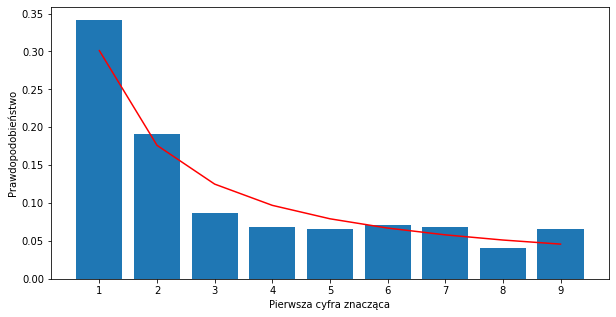

In [ ]:
empirical_counts_2_wave, empirical_frequency_2_wave, total_count_2_wave, digit_2_wave = count_first_digit(df_2_wave['new_cases'])

first_digit_chart(empirical_frequency_2_wave, theoretical_1st_number)

In [ ]:
data = df_1_wave['new_cases']
# Get only non-zero values
data = data[data>=1]

# Get the first digits
first_digits = list(map(lambda x: int(str(x)[0]), data))


# Count occurences. Make sure every position is for [1-9]
empirical_counts = np.zeros(9)
digit = []
for i in range(1, 10):
    empirical_counts[i - 1] = first_digits.count(i)
    digit.append(i)

# Total amount
total_count = sum(empirical_counts)
# Make percentage
empirical_frequency = [(i / total_count) for i in empirical_counts]
# Return
#return(empirical_counts, empirical_frequency, total_count, digit)

In [ ]:
data

29     392
30     437
31     244
32     475
33     311
      ... 
134    333
135    353
136    339
137    358
138    279
Name: new_cases, Length: 110, dtype: int64

In [ ]:
df.head(10)

,date,new_cases
0,2020-03-04,1
1,2020-03-05,0
2,2020-03-06,4
3,2020-03-07,0
4,2020-03-08,6
5,2020-03-09,5
6,2020-03-10,6
7,2020-03-11,9
8,2020-03-12,18
9,2020-03-13,19


In [ ]:
df.tail()

,date,new_cases
730,2022-03-04,12489
731,2022-03-05,12725
732,2022-03-06,7698
733,2022-03-07,5583
734,2022-03-08,13176


In [ ]:
df_d=load_data('Poland_COVID_deaths.xlsx')
df_d=df_d.dropna()
df_d.dropna(inplace=True)
df_d.reset_index(drop=True, inplace=True)
df_d['deaths']=df_d['deaths'].astype(int)

/usr/local/lib/python3.9/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
<ipython-input-100-342651dc2c8b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d['deaths']=df_d['deaths'].astype(int)


In [ ]:
df_d

,date,deaths
0,2020-03-04,0
1,2020-03-05,0
2,2020-03-06,0
3,2020-03-07,0
4,2020-03-08,0
...,...,...
730,2022-03-04,206
731,2022-03-05,199
732,2022-03-06,10
733,2022-03-07,6


In [ ]:
empirical_counts_deaths, empirical_frequency_deaths, total_count_deaths, digit_deaths = count_first_digit(df_d['deaths'])

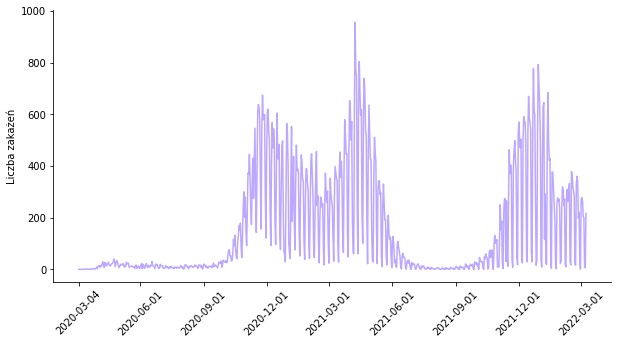

In [ ]:
plt.figure(figsize=(10, 5))


#plt.title(f"Wykres liczby zakażeń na COVID-19 w Polsce pomiędzy {df.date.iloc[0]} - {df.date.iloc[-1]}", fontsize = 10)
plt.plot(df_d.date, df_d.deaths, '#bca8ff')
#plt.xlim([datetime.date(2020,3,4),datetime.date(2020, 10, 10)])
plt.xticks(rotation = 45)

plt.ylabel("Liczba zakażeń", fontsize = 10)

ax = plt.gca()
list_x_tick = ["2020-03-04", "2020-06-01", "2020-09-01", "2020-12-01","2021-03-01" ,"2021-06-01" ,"2021-09-01", "2021-12-01","2022-03-01"]
ax.set_xticks(list_x_tick)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

<ipython-input-110-cbf8d5f750c5>:9: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use `.FigureManagerBase.set_window_title` or GUI-specific methods instead.
  fig.canvas.set_window_title('Percentage First Digits')


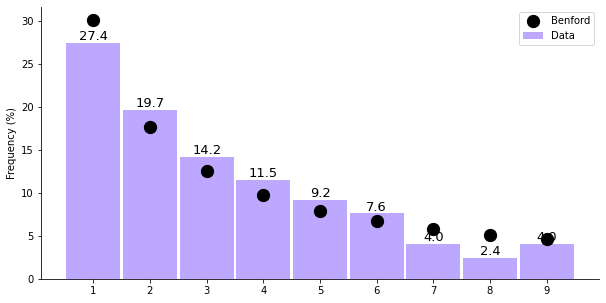

In [ ]:
first_digit_chart_dots(np.array(empirical_frequency_deaths)*100, np.array(theoretical_1st_number)*100, "")

In [ ]:
dfAll.Cz

<ipython-input-118-6a13f3a8223e>:46: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use `.FigureManagerBase.set_window_title` or GUI-specific methods instead.
  figure.canvas.set_window_title('Percentage First Digits')


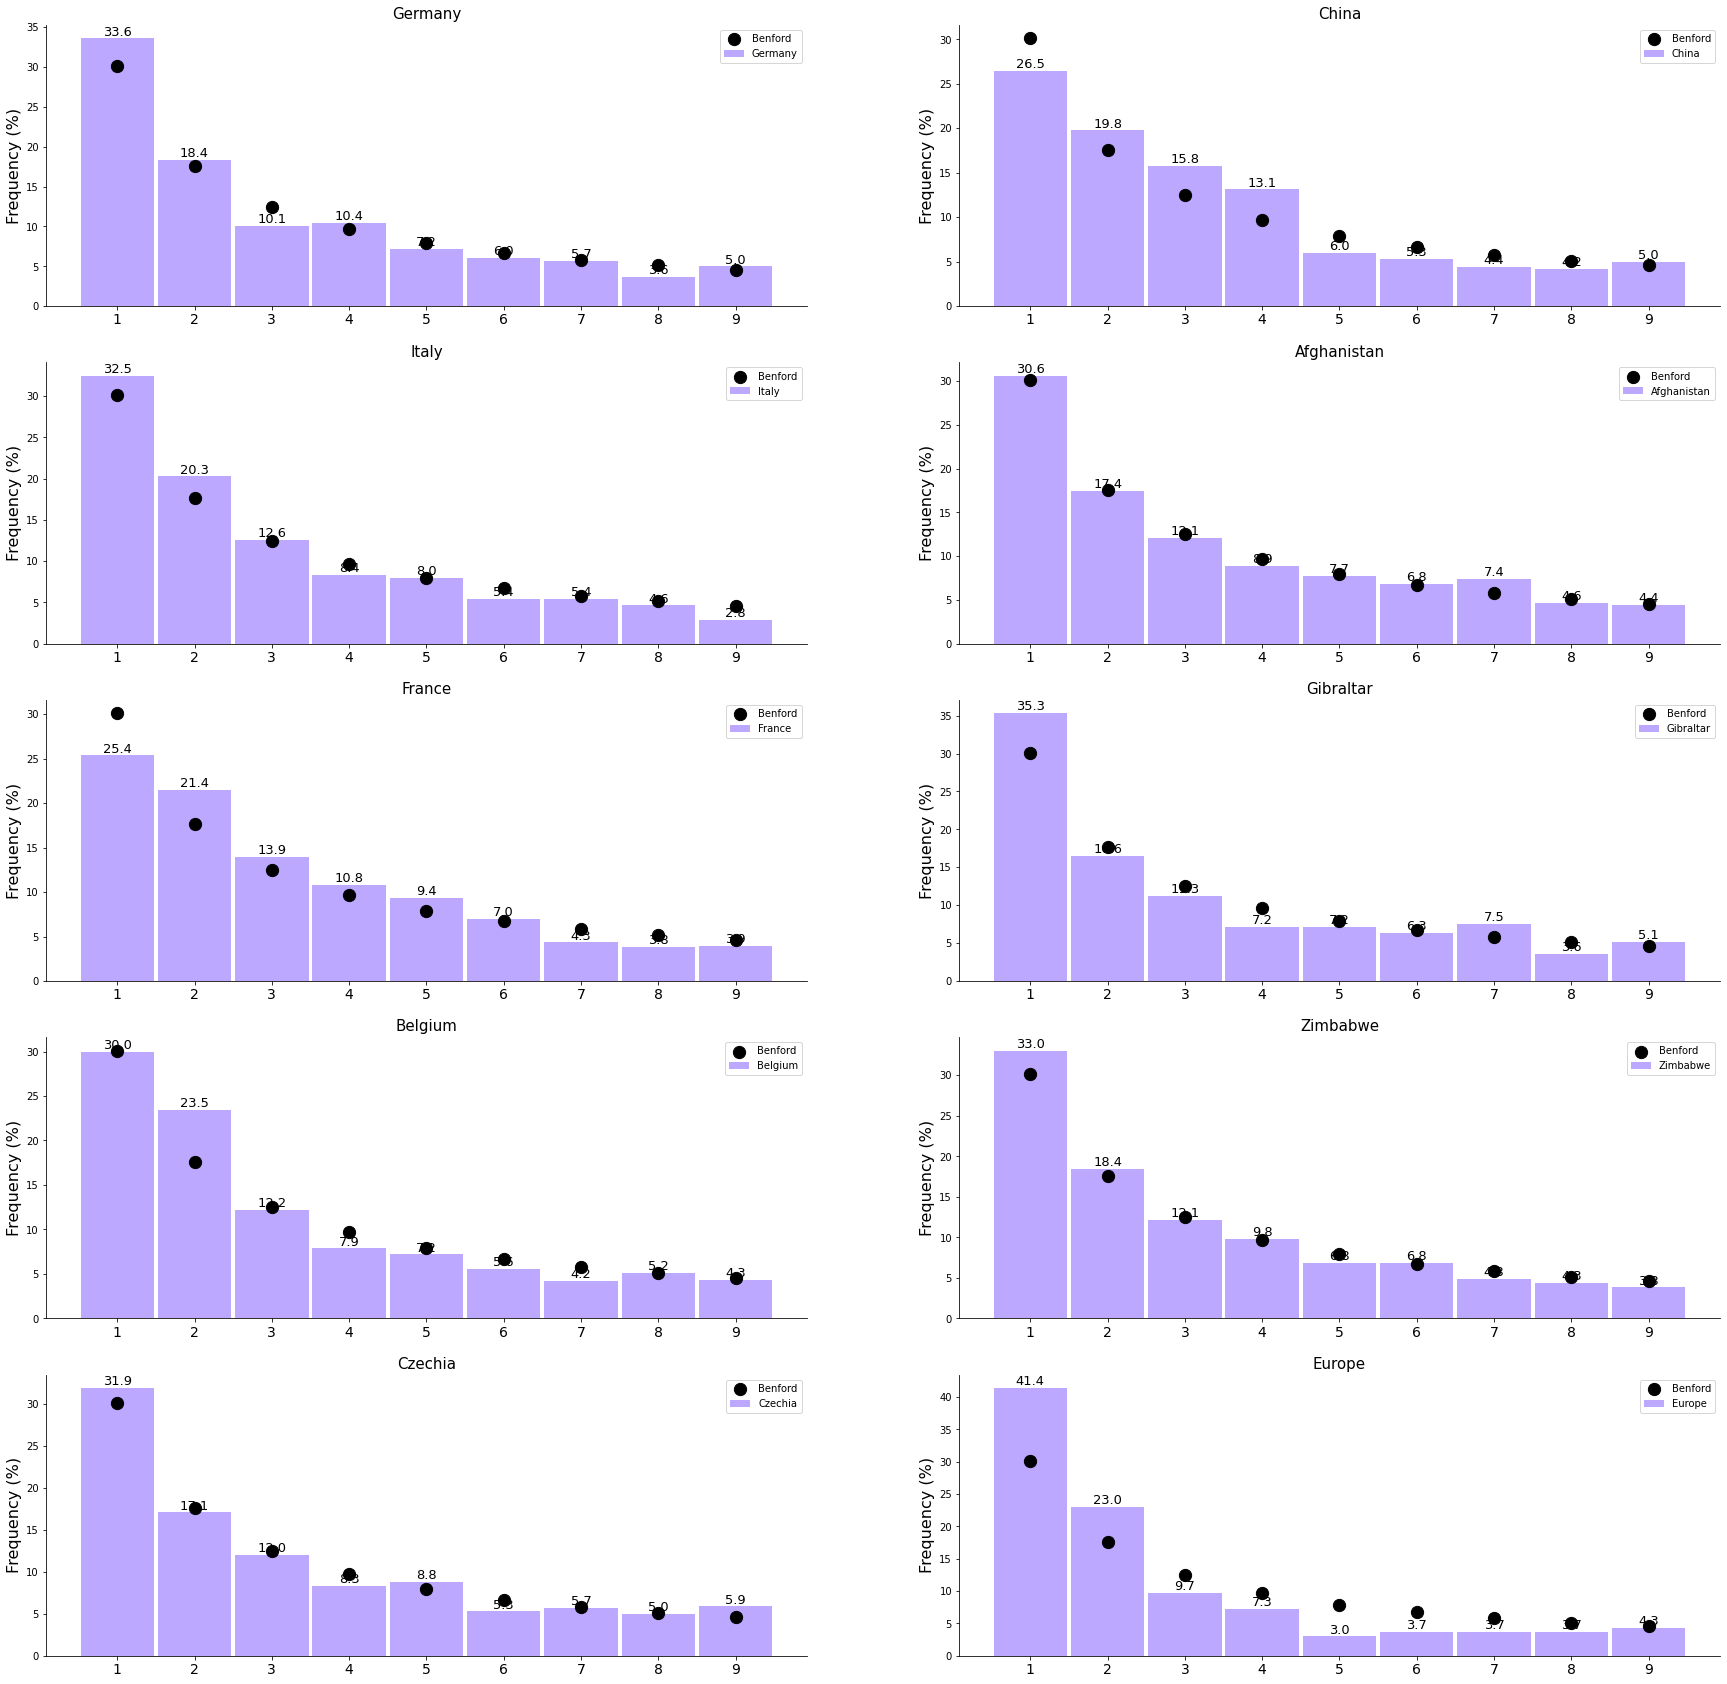

In [ ]:
# fig, axes = plt.subplots(3, 4, figsize=(25, 15))

# fig.suptitle('First digit for countries')


# fig, axs = plt.subplots(2, 3)
# axs[0, 0].plot(x, y)
# axs[0, 0].set_title('Axis [0, 0]')
# axs[0, 1].plot(x, y, 'tab:orange')
# axs[0, 1].set_title('Axis [0, 1]')
# axs[1, 0].plot(x, -y, 'tab:green')
# axs[1, 0].set_title('Axis [1, 0]')
# axs[1, 1].plot(x, -y, 'tab:red')
# axs[1, 1].set_title('Axis [1, 1]')

figure, axis = plt.subplots(5, 2, figsize=(30, 30))
k=0
j=0

for i in ["Germany", "Italy", "France", "Belgium", "Europe", "China", "Afghanistan", "Gibraltar", "Zimbabwe", "Czechia"]:

  df = newCasesForCountry(dfAll, i)

  empirical_counts, empirical_frequency, total_count, digit = count_first_digit(df['new_cases'])
  #empirical_counts2, empirical_frequency2, total_count2, digit2 = count_second_digit(df['new_cases'])
  #empirical_two_first_counts, empirical_two_first_frequency2, total_two_first_count2, digit_two_first = count_two_first_digit(df['new_cases'])


  #first_digit_chart(empirical_frequency, theoretical_1st_number, "Pierwsza cyfra znacząca dla " + i) 
  #pl.show()


  x = [i for i in range(1,10)]
  x = np.array(x)
  y1 = np.array(empirical_frequency)*100
  y2 = np.array(theoretical_1st_number)*100
  
      
  # plt.figure(figsize=(10, 5))
  #plt.xticks(x)
  #---------------------------------------------------------------------------
  #figure, axis[k, j] = plt.subplots(figsize = (20,5))
  index = [i + 1 for i in range(len(y1))]  # 1st digits for x-axis
  # text for labels, title and ticks

  figure.canvas.set_window_title('Percentage First Digits')
  axis[k, j].set_title(i, fontsize=15)
  axis[k, j].set_ylabel('Frequency (%)', fontsize=16)
  #axis[k, j].set_xlabel("Pierwsza cyfra znacząca")
  axis[k, j].set_xticks(index)
  axis[k, j].set_xticklabels(index, fontsize=14)

  # build bars    
  rects = axis[k, j].bar(index, y1, width=0.95, color='#bca8ff', label=i)

  # attach a text label above each bar displaying its height
  for rect in rects:
      height = rect.get_height()
      axis[k, j].text(rect.get_x() + rect.get_width()/2, height, '{:0.1f}'.format(height), ha='center', va='bottom', fontsize=13)
  # plot Benford values as red dots
  axis[k, j].scatter(index, y2, s=150, c='black', zorder=2, label='Benford')
  # Hide the right and top spines & add legend
  axis[k, j].spines['right'].set_visible(False)
  axis[k, j].spines['top'].set_visible(False)
  axis[k, j].legend(prop={'size':10}, frameon=True)
  # plt.show()

  # plt.ylabel("Prawdopodobieństwo")
  # plt.xlabel("Pierwsza cyfra znacząca")
  #plt.title(title)
  #plt.scatter(x, y2, s=150, c='red', zorder=2, marker = 11)
  # plt.plot(x, y2, zorder = 2, c='red')
  # plt.bar(x, y1)


  # axis[k, j].set_xticks(x)
  # axis[k, j].plot(x, y2, zorder = 2, c='red')
  # axis[k, j].bar(x, y1) 
  # axis[k, j].set_title("Pierwsza cyfra znacząca dla " + i)
  k=(k+1)%5
  if k==4: j+=1
  j=(j)%2
plt.show()

In [ ]:
dfAll.China

0         NaN
1        92.0
2       277.0
3       483.0
4       663.0
        ...  
1071      0.0
1072      0.0
1073      0.0
1074      0.0
1075      0.0
Name: China, Length: 1076, dtype: float64

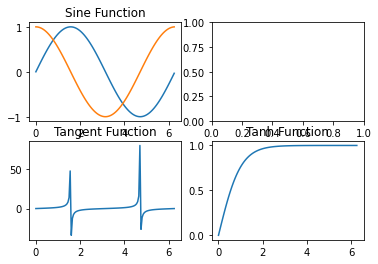

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Get the angles from 0 to 2 pie (360 degree) in narray object
X = np.arange(0, math.pi*2, 0.05)
  
# Using built-in trigonometric function we can directly plot
# the given cosine wave for the given angles
Y1 = np.sin(X)
Y2 = np.cos(X)
Y3 = np.tan(X)
Y4 = np.tanh(X)
  
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)
  
# For Sine Function
axis[0, 0].plot(X, Y1)
axis[0, 0].set_title("Sine Function")
  
# For Cosine Function
axis[0, 0].plot(X, Y2)
  
# For Tangent Function
axis[1, 0].plot(X, Y3)
axis[1, 0].set_title("Tangent Function")
  
# For Tanh Function
axis[1, 1].plot(X, Y4)
axis[1, 1].set_title("Tanh Function")
  
# Combine all the operations and display
plt.show()